In [4]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import time

class HISHotelsScraper:
    def __init__(self, database_name='hotels.db'):
        self.db_name = database_name
        self.create_table()

    def create_table(self):
        """データベースにテーブルを作成する"""
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        c.execute('''
            CREATE TABLE IF NOT EXISTS hotels (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT,
                price TEXT,
                area TEXT
            )
        ''')
        conn.commit()
        conn.close()

    def scrape_hotels(self, url, area):
        """指定されたURLからホテル名と価格をスクレイピングし、データベースに保存する"""
        response = requests.get(url)
        response.raise_for_status()  # ステータスコードが200以外の場合例外を発生させる
        soup = BeautifulSoup(response.content, 'html.parser')

        # ホテル情報を含む要素を探す
        search_items = soup.find_all('div', class_='item-wrap__main')

        # データベースにホテル名と金額を保存する
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        for item in search_items:
            name_tag = item.find('span', class_='item-wrap__title-ja')
            price_tag = item.find('span', class_='price--body')
            if name_tag and price_tag:
                hotel_name = name_tag.get_text(strip=True)
                hotel_price = price_tag.get_text(strip=True)
                c.execute('INSERT INTO hotels (name, price, area) VALUES (?, ?, ?)', (hotel_name, hotel_price, area))
                print(f'Inserting hotel name into DB: {hotel_name}, Price: {hotel_price}, Area: {area}')  # デバッグ用出力

        conn.commit()
        conn.close()

    def get_hotels(self):
        """データベースからホテル名と価格を取得する"""
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        c.execute('SELECT name, price, area FROM hotels')
        hotels = c.fetchall()  # 取得したデータをすべてfetchする
        conn.close()
        return hotels

    def clear_hotels(self):
        """テーブル内の既存のデータをクリア"""
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        c.execute('DELETE FROM hotels')
        conn.commit()
        conn.close()



In [ ]:
ホテル名と料金をスクレイピングする

In [5]:
def main():
    urls_and_areas = [
        ('https://hotel.his-j.com/search/?isAutoSelect=true&checkInDate=20250201&checkOutDate=20250202&prefecture=40&area=259&room=1&room1Adult=1', '福岡'),
        ('https://hotel.his-j.com/search/?t=KoDl3QI0sklQrCJb&stayPrefecture=40&stayArea=259&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=258&district=&minRate=0&maxRate=', '福岡'),
        ('https://hotel.his-j.com/search/?t=GRcuxqez8wDYJAMF&stayPrefecture=40&stayArea=258&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=260&district=&minRate=0&maxRate=', '福岡'),
        ('https://hotel.his-j.com/search/?t=2LB3Eg02TNiWeHvz&stayPrefecture=40&stayArea=260&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&prefecture=40&area=261&district=&minRate=0&maxRate=', '福岡'),
        ('https://hotel.his-j.com/search/?t=22CNCIODFxBUufqi&stayPrefecture=40&stayArea=261&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=263&district=&minRate=0&maxRate=', '福岡'),
        ('https://hotel.his-j.com/search/?t=cVvc906fcadc7G6m&stayPrefecture=40&stayArea=263&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=257&district=&minRate=0&maxRate=', '福岡'),
        ('https://hotel.his-j.com/search/?t=5dYUfIrRH2UgLdRK&stayPrefecture=41&stayArea=268&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&prefecture=41&area=&district=&minRate=0&maxRate=', '佐賀'),
        ('https://hotel.his-j.com/search/?t=rsNkeDQmkJnxgp6e&stayPrefecture=41&stayArea=&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=42&area=&district=&minRate=0&maxRate=', '長崎'),
        ('https://hotel.his-j.com/search/?t=HhRDJFI6BAa26Suw&stayPrefecture=42&stayArea=&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=43&area=&district=&minRate=0&maxRate=','熊本'),
        ('https://hotel.his-j.com/search/?t=HtbC5pLwqoa1jgAA&stayPrefecture=43&stayArea=&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=44&area=&district=&minRate=0&maxRate=', '大分'),
        ('https://hotel.his-j.com/search/?t=IaaOL8aa9CFG0Lnp&stayPrefecture=44&stayArea=&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=45&area=&district=&minRate=0&maxRate=', '宮崎'),
        ('https://hotel.his-j.com/search/?t=NgIAjhKC1F4kgcjP&stayPrefecture=45&stayArea=&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=46&area=&district=&minRate=0&maxRate=', '鹿児島')
    ]

    scraper = HISHotelsScraper()

    # データベース内の既存のデータをクリア
    scraper.clear_hotels()

    # 各URLを順に処理
    for url, area in urls_and_areas:
        # サーバ負荷に配慮してリクエスト間隔を設ける
        time.sleep(2)
        scraper.scrape_hotels(url, area)

    # データベースに保存されたホテル名と金額を取得して表示
    hotels = scraper.get_hotels()
    for hotel in hotels:
        print(f'Hotel from DB: Name: {hotel[0]}, Price: {hotel[1]}, Area: {hotel[2]}')

if __name__ == "__main__":
    main()

Inserting hotel name into DB: ホテルモントレ福岡, Price: 36,740, Area: 福岡
Inserting hotel name into DB: ホテル モンテ エルマーナ福岡, Price: 31,950, Area: 福岡
Inserting hotel name into DB: lyf Tenjin Fukuoka（ライフ天神福岡）, Price: 40,120, Area: 福岡
Inserting hotel name into DB: 変なホテル福岡博多, Price: 23,730, Area: 福岡
Inserting hotel name into DB: ヒルトン福岡シーホーク, Price: 54,710, Area: 福岡
Inserting hotel name into DB: ホテルウィングインターナショナルセレクト博多駅前, Price: 32,900, Area: 福岡
Inserting hotel name into DB: ANAクラウンプラザホテル福岡, Price: 45,000, Area: 福岡
Inserting hotel name into DB: キャナルシティ福岡ワシントンホテル, Price: 17,820, Area: 福岡
Inserting hotel name into DB: スカイハートホテル博多, Price: 19,210, Area: 福岡
Inserting hotel name into DB: ホテル日航福岡, Price: 44,020, Area: 福岡
Inserting hotel name into DB: ザ・ライブリー福岡博多（THE LIVELY　福岡博多）, Price: 44,630, Area: 福岡
Inserting hotel name into DB: ホテルトリフィート博多祇園, Price: 44,340, Area: 福岡
Inserting hotel name into DB: the b 博多, Price: 33,000, Area: 福岡
Inserting hotel name into DB: 東急ステイ福岡天神, Price: 20,000, Area: 福岡
Inserting hot

In [ ]:
ホテルの平均料金を県別に計算し、それを可視化する

県ごとの平均料金:
県名: 佐賀, 平均料金: 30175.56円
県名: 大分, 平均料金: 42623.02円
県名: 宮崎, 平均料金: 25162.86円
県名: 熊本, 平均料金: 17118.25円
県名: 福岡, 平均料金: 29760.52円
県名: 長崎, 平均料金: 25117.58円
県名: 鹿児島, 平均料金: 17042.08円


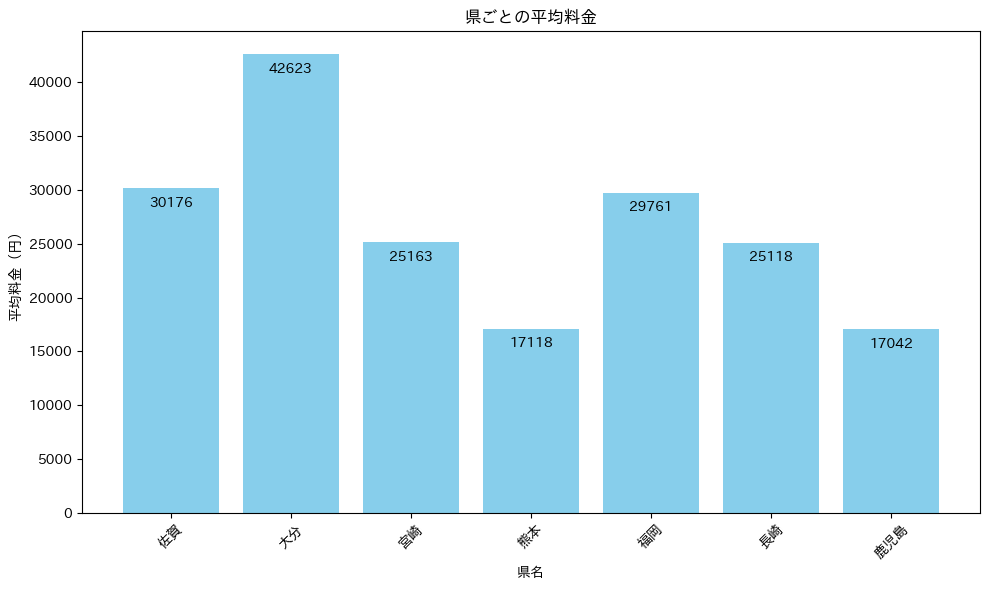

In [41]:
import matplotlib.pyplot as plt
import japanize_matplotlib


def calculate_average_prices_by_area(database_name='hotels.db'):
    conn = sqlite3.connect(database_name)
    c = conn.cursor()
    
    query = '''
        SELECT area, AVG(CAST(REPLACE(price, ',', '') AS REAL)) as average_price
        FROM hotels
        GROUP BY area
    '''
    
    c.execute(query)
    results = c.fetchall()
    conn.close()
    
    return results

def visualize_average_prices(data, budget=None):
    areas = [x[0] for x in data]
    prices = [x[1] for x in data]

    # 棒グラフを描画
    plt.figure(figsize=(10, 6))
    bars = plt.bar(areas, prices, color='skyblue')
    
   
    plt.xlabel('県名')
    plt.ylabel('平均料金（円）')
    plt.title('県ごとの平均料金')
    plt.xticks(rotation=45)
    
    # バーの上に平均料金を表示
    for bar, price in zip(bars, prices):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2000, f'{price:.0f}', 
                 ha='center', va='bottom', color='black')

    plt.tight_layout()
    plt.show()

def get_recommended_areas(average_prices, budget):
    recommendations = [area for area, avg_price in average_prices if avg_price <= budget]
    return recommendations

if __name__ == "__main__":
    data = calculate_average_prices_by_area()
    print("県ごとの平均料金:")
    for area, avg_price in data:
        print(f"県名: {area}, 平均料金: {avg_price:.2f}円")

    
    # グラフを表示
    visualize_average_prices(data, budget=user_budget)
    

In [ ]:
ホテルの平均料金と観光来訪者数の相関係数を計算する

In [42]:
import pandas as pd
import numpy as np

# CSVファイルのパス
csv_file_path = '/Users/wakayamakoume/Dsprog 2/trip/pref202412.csv'

# 観光来訪者数のCSVファイルを読み込みます
tourism_data = pd.read_csv(csv_file_path)

# 各県の平均料金データを作成します
average_prices_data = {
    '県名': ['佐賀県', '大分県', '宮崎県', '熊本県', '福岡県', '長崎県', '鹿児島県'],
    '平均料金': [30175.56, 42623.02, 25162.86, 17118.25, 29760.52, 25117.58, 17042.08]
}

average_prices_df = pd.DataFrame(average_prices_data)

# 観光来訪者数のデータから必要な列を抽出
tourism_data_filtered = tourism_data[(tourism_data['地域区分'] == '都道府県') & 
                                      (tourism_data['データ区分'] == '観光来訪者数')]

# 県名でデータフレームをマージ
merged_data = pd.merge(tourism_data_filtered, average_prices_df, left_on='地域名称', right_on='県名')

# 必要な列のみを抽出
final_data = merged_data[['地域名称', '平均料金', '人数']]

# 平均料金と観光客数の相関係数を計算
correlation = final_data['平均料金'].corr(final_data['人数'])

print(final_data)
print(f"平均料金と観光来訪者数の相関係数: {correlation:.2f}")

   地域名称      平均料金       人数
0   福岡県  29760.52  3858027
1   佐賀県  30175.56  2438643
2   長崎県  25117.58  1348790
3   熊本県  17118.25  1238791
4   大分県  42623.02  1071783
5   宮崎県  25162.86   843306
6  鹿児島県  17042.08  1387731
平均料金と観光来訪者数の相関係数: 0.15


ホテルの平均料金と観光来訪者数に相関関係はない